In [141]:
import tensorflow as tf
import keras
from keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
#dataset_directory = "C:/Users/Apoorva/Downloads/archive (2)/"

dataset_directory = "data/train"

In [46]:
#image size and batch to use in model
image_height = 128
image_width = 128

In [143]:
# Preparing Training, Validation and Test Datasets
train_dataset, val_test_dataset = keras.utils.image_dataset_from_directory(
    directory=dataset_directory,
    image_size=(image_height, image_width),
    color_mode='grayscale',
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
    validation_split=0.3,
    subset="both",
    seed=20,
    shuffle=True
)

Found 5712 files belonging to 4 classes.
Using 3999 files for training.
Using 1713 files for validation.


In [145]:
train_dataset.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [144]:
val_dataset = val_test_dataset.take(val_test_dataset.cardinality()//3)
test_dataset = val_test_dataset.skip(val_test_dataset.cardinality()//3)

2025-05-13 06:29:30.286913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


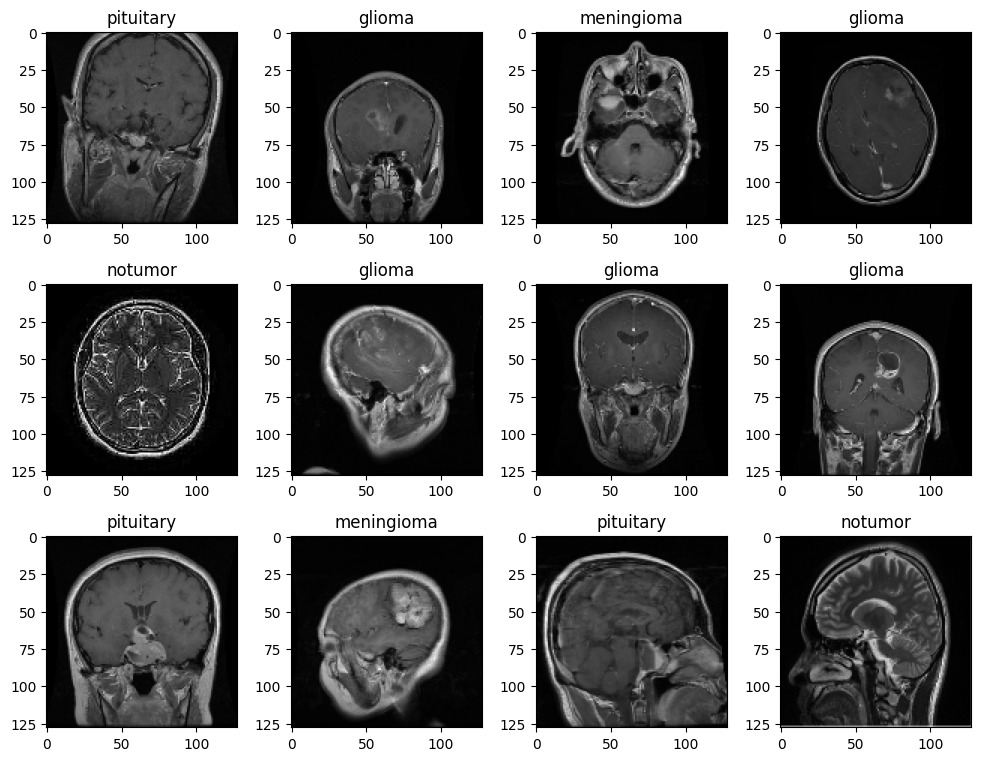

In [146]:
plt.figure(figsize=(10,10))

for images, labels in train_dataset.shuffle(buffer_size=100).take(1):
    for i in range(12):
        plt.subplot(4,4,i+1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")), cmap="gray")
        plt.title(train_dataset.class_names[np.argmax(labels[i])])
        plt.tight_layout()


In [147]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset_cached = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset_cached = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset_cached = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [148]:
AUTOTUNE

-1

In [149]:
model = keras.models.Sequential([
    Input(shape=(image_height, image_width, 1), batch_size=batch_size),
    Rescaling(scale=1./255),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=4, activation='softmax')    
])

In [150]:
model.summary()

Model: "sequential_4"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (252, 128, 128, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (252, 126, 126, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (252, 63, 63, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (252, 61, 61, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤

In [151]:
optimizer = keras.optimizers.Adam(learning_rate=.01)
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [152]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3,              
    restore_best_weights=True
)

history = model.fit(train_dataset_cached,epochs=20,batch_size= 256, 
validation_data=val_dataset_cached, callbacks=[early_stop])

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3028 - loss: 3.3722 - val_accuracy: 0.5913 - val_loss: 1.1597
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5762 - loss: 1.0621 - val_accuracy: 0.6766 - val_loss: 0.8142
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.6991 - loss: 0.7637 - val_accuracy: 0.7579 - val_loss: 0.5903
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7548 - loss: 0.6257 - val_accuracy: 0.7956 - val_loss: 0.5026
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8006 - loss: 0.5349 - val_accuracy: 0.8095 - val_loss: 0.4576
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8216 - loss: 0.4556 - val_accuracy: 0.8214 - val_loss: 0.4351
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8335 - loss: 0.4343 - val_accuracy: 0.8333 - val_loss: 0.4467
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.8447 - loss: 0.4127 - val_accuracy: 0.8552 - val_loss:

In [153]:
model_saving_path = 'brain_tumor_classification.h5'
model.save(model_saving_path, overwrite=True)

# ACCUARACY CURVE

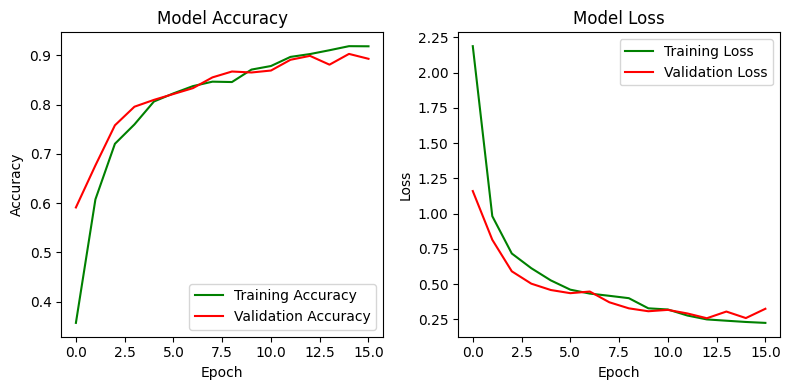

In [154]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Training Accuracy", color='green')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='red')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Training Loss", color="green")
plt.plot(history.history['val_loss'], label="Validation Loss", color="red")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [155]:
from tensorflow.keras.models import load_model

model = load_model('brain_tumor_classification.h5')
model.evaluate(test_dataset_cached, batch_size=batch_size)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.8970 - loss: 0.3147


[0.315110981464386, 0.8974359035491943]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


2025-05-13 06:43:47.708525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


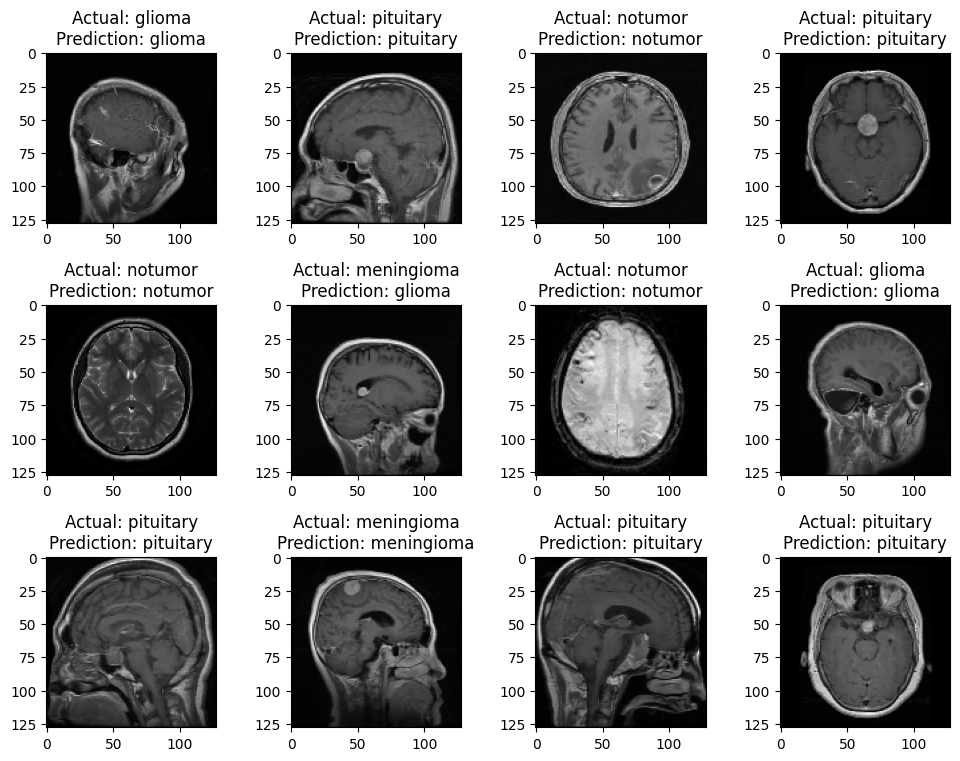

In [156]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.shuffle(buffer_size=100).take(1):
    for i in range(12):
        actual_label = train_dataset.class_names[np.argmax(labels[i])]
        img2predict = np.squeeze(images[i].numpy().astype("uint8"))
                
        plt.subplot(4, 4, i + 1)
        plt.imshow(img2predict, cmap="gray")

        img2predict = np.expand_dims(img2predict, axis=0)
        
        predictions = model.predict(img2predict)
        prediction = np.argmax(predictions[0])
        
        if prediction == 0:
            predicted_label = 'glioma'
        elif prediction == 1:
            predicted_label = 'meningioma'
        elif prediction == 2:
            predicted_label = 'notumor'
        else:
            predicted_label ='pituitary'

        
        plt.title(f"Actual: {actual_label}\nPrediction: {predicted_label}")
        plt.tight_layout()

In [157]:
test_data_path = 'data/test'

test_data = keras.utils.image_dataset_from_directory(
    directory=test_data_path,
    image_size=(image_height, image_width),
    color_mode='grayscale',
    batch_size=batch_size,
    shuffle=False
)

print(test_data)

Found 800 files belonging to 4 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [158]:
# Unbatch and collect
all_images = []
all_labels = []

for img_batch, label_batch in test_data.unbatch():
    all_images.append(img_batch.numpy())
    all_labels.append(label_batch.numpy())

# Convert to numpy arrays
all_images = tf.stack(all_images)
all_labels = tf.convert_to_tensor(all_labels)

2025-05-13 06:45:05.687762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [162]:
pred = model.predict(test_data)
predictions = np.argmax(pred, axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step


In [163]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score

print('Confusion Matrix')
print(confusion_matrix(all_labels, predictions))
print('Accuracy: ', accuracy_score(all_labels, predictions))
print('Precision: ', precision_score(all_labels, predictions, average = 'macro'))
print('Recall: ', recall_score(all_labels, predictions, average = 'macro'))
print('F1: ', f1_score(all_labels, predictions, average = 'macro'))

Confusion Matrix
[[162  32   0   6]
 [ 27 151  10  12]
 [  0  42 147  11]
 [  1   1   0 198]]
Accuracy:  0.8225
Precision:  0.8323314000967603
Recall:  0.8225
F1:  0.8226548246778598


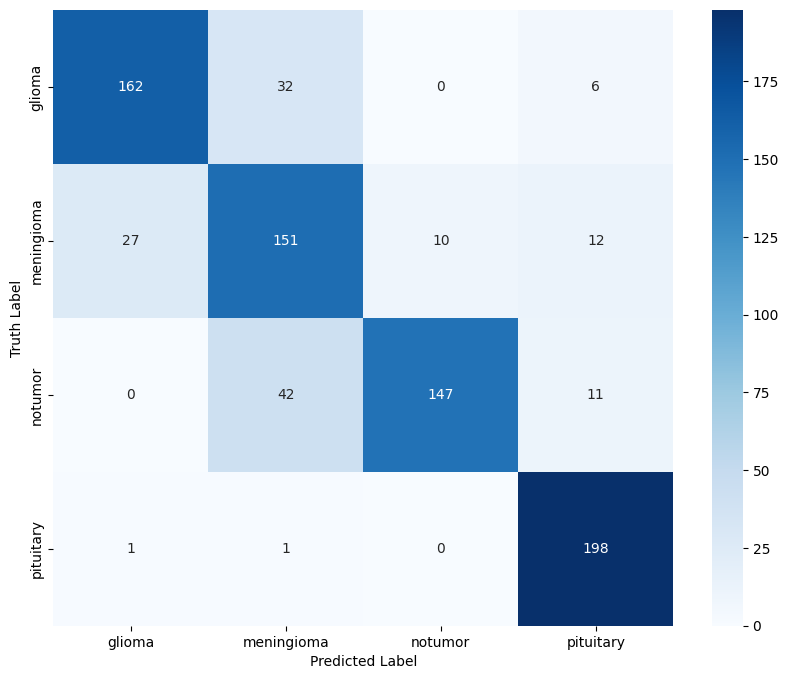

In [166]:
import seaborn as sns

cm = confusion_matrix(all_labels, predictions)
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [170]:
import joblib

joblib.dump((actual_labels, predictions), 'confusion_data.pkl')

cm = confusion_matrix(all_labels, predictions)
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

fig, ax = plt.subplots(figsize=(6, 4), facecolor='none')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels, ax=ax, cbar=False)

# Set labels and title with white color
ax.set_xlabel('Predicted', color='white')
ax.set_ylabel('True', color='white')
ax.set_title('Confusion Matrix', color='white')

# Set tick label color to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Save the figure with transparent background
plt.tight_layout()
plt.savefig("confusion_matrix.png", transparent=True)
plt.close()

## ResNet50

In [71]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Flatten

#base_model = keras.applications.resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))

input_tensor = Input(shape=(128, 128, 3))

# Load ResNet50 without top layer, with downloaded weights
base_model = ResNet50(
    weights='resnet50_notop.h5',
    include_top=False,
    input_tensor=input_tensor
)

print(base_model.summary())

Model: "resnet50"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│

In [72]:
# Freeze the already trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
dense_layer1 = Dense(128, activation='relu')(x)
Dropout1 = Dropout(0.3)(dense_layer1)
dense_layer2 = Dense(units=32, activation='relu')(Dropout1)
Dropout2 = Dropout(0.2)(dense_layer2)
prediction_layer = Dense(units=4, activation='softmax')(Dropout2)
model = Model(inputs=base_model.input, outputs=prediction_layer)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "functional_19"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼──────────────────────────

In [73]:
def preprocess(image, label):
    image = tf.image.grayscale_to_rgb(image)
    return image, label

train_ds = train_dataset_cached.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_ds = val_dataset_cached.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [75]:
train_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [76]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=3,              
    restore_best_weights=True
)

history = model.fit(train_ds,epochs=20,batch_size= 512, 
validation_data=val_ds, callbacks=[early_stop])

Epoch 1/20


/Users/sandeep/Desktop/COMPUTER-VISION/venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1386']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5886 - loss: 2.1024 

/Users/sandeep/Desktop/COMPUTER-VISION/venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1386']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


56/56 ━━━━━━━━━━━━━━━━━━━━ 883s 16s/step - accuracy: 0.5906 - loss: 2.0870 - val_accuracy: 0.8700 - val_loss: 0.3329
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 455s 8s/step - accuracy: 0.8351 - loss: 0.4646 - val_accuracy: 0.8963 - val_loss: 0.2647
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1227s 22s/step - accuracy: 0.8723 - loss: 0.3429 - val_accuracy: 0.9266 - val_loss: 0.2062
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1125s 20s/step - accuracy: 0.9041 - loss: 0.2487 - val_accuracy: 0.9335 - val_loss: 0.1839
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 651s 11s/step - accuracy: 0.9167 - loss: 0.2258 - val_accuracy: 0.9400 - val_loss: 0.1634
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 794s 14s/step - accuracy: 0.9429 - loss: 0.1612 - val_accuracy: 0.9425 - val_loss: 0.1508
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 881s 16s/step - accuracy: 0.9433 - loss: 0.1489 - val_accuracy: 0.9509 - val_loss: 0.1352
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 773s 14s/step - accuracy: 0.9567 - loss: 0.1230 - val_accuracy: 0.9593 - val

In [77]:
model_saving_path = 'model.h5'
model.save(model_saving_path, overwrite=True)

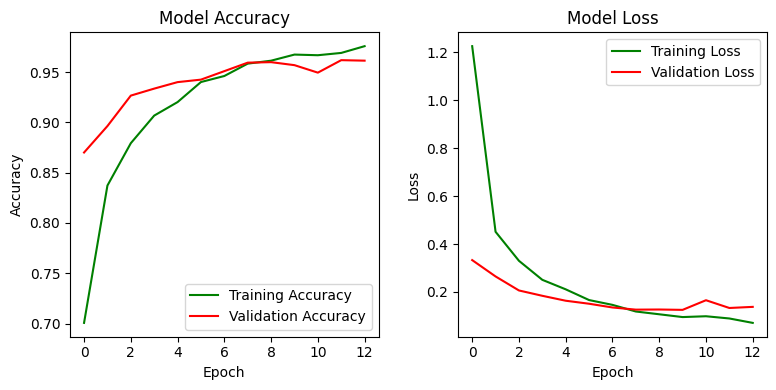

In [78]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Training Accuracy", color='green')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='red')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Training Loss", color="green")
plt.plot(history.history['val_loss'], label="Validation Loss", color="red")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [122]:
test_data_path = 'data/test'

test_data = keras.utils.image_dataset_from_directory(
    directory=test_data_path,
    image_size=(image_height, image_width),
    color_mode='grayscale',
    batch_size=batch_size,
    shuffle=False
)

print(test_data)

Found 800 files belonging to 4 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [123]:
def preprocess(image, label):
    image = tf.image.grayscale_to_rgb(image)
    return image, label

test_data = test_data.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_data

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [124]:
# Unbatch and collect
all_images = []
all_labels = []

for img_batch, label_batch in test_data.unbatch():
    all_images.append(img_batch.numpy())
    all_labels.append(label_batch.numpy())

# Convert to numpy arrays
all_images = tf.stack(all_images)
all_labels = tf.convert_to_tensor(all_labels)

2025-05-12 20:06:11.680274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [126]:
pred = model.predict(test_data)
predictions = np.argmax(pred, axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step


In [135]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score

pred = model.predict(test_data)
predictions = np.argmax(pred, axis = 1)

print('Confusion Matrix')
print(confusion_matrix(all_labels, predictions))
print('Accuracy: ', accuracy_score(all_labels, predictions))
print('Precision: ', precision_score(all_labels, predictions, average = 'macro'))
print('Recall: ', recall_score(all_labels, predictions, average = 'macro'))
print('F1: ', f1_score(all_labels, predictions, average = 'macro'))

Confusion Matrix
[[132  65   0   3]
 [ 10 180   6   4]
 [  0   0 200   0]
 [  1  10   0 189]]
Accuracy:  0.87625
Precision:  0.8910296941778952
Recall:  0.87625
F1:  0.8751638052306596
